In [2]:
import sys
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
# print(matplotlib.matplotlib_fname())
from matplotlib import rc
rc('font', family="serif")
rc('text', usetex=True)

In [8]:
kit_blue_1 = "#4664AA"
kit_blue_2 = "#7D92C3"

run = "athlete"
# writtenwork_depth # musicalwork_breadth # athlete # politician_breadth # species_depth # anatomicalstructure_breadth # wikidata
res_glob = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
# res_wikidata_glob = pd.read_csv("out/_results_wikidata.csv", index_col=0)
# res_athlete_glob = pd.read_csv("out/_results_athlete.csv", index_col=0)
# res_random_glob = pd.read_csv("out/_results_random_run.csv", index_col=0)

# Control which classes to analyze. Add or remove rows in res_glob DataFrame
# res_glob = pd.concat([res_glob, res_athlete_glob, res_wikidata_glob, res_random_glob])
# res_glob = res_glob.loc[[
#                         "WrittenWork", "WrittenWorkRandom",
#                         "AcademicJournal", "AcademicJournalRandom", "ScientificJournalWikidata",
#                         "Comic", "ComicRandom", "ComicWikidata",
#                         "Manga", "MangaRandom",
#                         "Novel",
#                         "PeriodicalLiterature", "PeriodicalLiteratureRandom",
#                         "Newspaper", "NewspaperRandom",
#                         "Poem", "PoemRandom",
#                         "Boxer", "BoxerWikidata",
#                         "Cyclist", "CyclistWikidata",
#                         ]]

res_disp = res_glob.copy()
# Add following columns
res_disp["ratio_sp"] = res_disp.apply(lambda row: row.n_t / row.n_b, axis=1)
res_disp["rel_k_0_t"] = res_disp.apply(lambda row: row.k_0_t / row.n_b, axis=1)
res_disp["rel_k_0_b"] = res_disp.apply(lambda row: row.k_0_b / row.n_t, axis=1)
# Format integer
res_disp["n_t"] = res_disp["n_t"].map("{:,.0f}".format)
res_disp["n_b"] = res_disp["n_b"].map("{:,.0f}".format)
res_disp["m_g"] = res_disp["m_g"].map("{:,.0f}".format)
res_disp["ndisc_t"] = res_disp["ndisc_t"].map("{:,.0f}".format)
res_disp["ndisc_b"] = res_disp["ndisc_b"].map("{:,.0f}".format)
res_disp["m_t"] = res_disp["m_t"].map("{:,.0f}".format)
res_disp["m_b"] = res_disp["m_b"].map("{:,.0f}".format)
res_disp["k_0_t"] = res_disp["k_0_t"].map("{:,.0f}".format)
res_disp["k_0_b"] = res_disp["k_0_b"].map("{:,.0f}".format)
res_disp["k_med_t"] = res_disp["k_med_t"].map("{:,.0f}".format)
res_disp["c_med_t"] = res_disp["c_med_t"].map("{:,.0f}".format)
res_disp["w_med_t"] = res_disp["w_med_t"].map("{:,.0f}".format)
res_disp["k_med_b"] = res_disp["k_med_b"].map("{:,.0f}".format)
res_disp["c_med_b"] = res_disp["c_med_b"].map("{:,.0f}".format)
res_disp["w_med_b"] = res_disp["w_med_b"].map("{:,.0f}".format)

# Format float with two decimals as standard
# pd.options.display.float_format = '{:,.2f}'.format # https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns

# Format float with four decimals
res_disp["mean_dens_t"] = res_disp["mean_dens_t"].map("{:,.4f}".format)
res_disp["rc_dens_t"] = res_disp["rc_dens_t"].map("{:,.4f}".format)
res_disp["rc_ncomp_t"] = res_disp["rc_ncomp_t"].map("{:,.4f}".format)
res_disp["rc_slcc_t"] = res_disp["rc_slcc_t"].map("{:,.4f}".format)
res_disp["mean_dens_b"] = res_disp["mean_dens_b"].map("{:,.4f}".format)
res_disp["rc_dens_b"] = res_disp["rc_dens_b"].map("{:,.4f}".format)
res_disp["rc_ncomp_b"] = res_disp["rc_ncomp_b"].map("{:,.4f}".format)
res_disp["rc_slcc_b"] = res_disp["rc_slcc_b"].map("{:,.4f}".format)

print(res_glob.index.tolist())
display(res_disp[["n_t", "n_b", "dens_t", "dens_b", "rel_k_0_t", "rel_k_0_b", "rc_dens_t", "rc_dens_b", "rel_rc_t", "rel_rc_b"]])

['Athlete', 'Boxer', 'AmateurBoxer', 'GridironFootballPlayer', 'AmericanFootballPlayer', 'MotorsportRacer', 'RacingDriver', 'FormulaOneRacer', 'NascarDriver', 'WinterSportPlayer', 'Curler', 'IceHockeyPlayer', 'Skier', 'BaseballPlayer', 'BasketballPlayer', 'ChessPlayer', 'Cyclist', 'Fencer', 'GolfPlayer', 'HorseRider', 'PokerPlayer', 'SoccerPlayer', 'TennisPlayer']


,n_t,n_b,dens_t,dens_b,rel_k_0_t,rel_k_0_b,rc_dens_t,rc_dens_b,rel_rc_t,rel_rc_b
Athlete,"404,915","10,030",0.963014,0.014080,0.022532,0.860045,0.0009,0.0000,NaN,NaN
Boxer,"6,457",535,0.958609,0.151080,0.080374,0.924268,0.0190,0.0015,21.624237,231.267091
AmateurBoxer,445,80,1.000000,0.546835,0.350000,inf,0.1734,0.0515,197.006756,7750.214705
GridironFootballPlayer,"26,560","1,582",0.983335,0.062167,0.049937,0.936145,0.0094,0.0004,10.709795,62.055436
AmericanFootballPlayer,"21,579","1,467",0.981450,0.065589,0.053851,0.943556,0.0113,0.0005,12.791436,79.064663
MotorsportRacer,"7,838","1,204",0.918255,0.066540,0.056478,0.732202,0.0059,0.0004,6.674439,55.002322
RacingDriver,"5,454",894,0.899112,0.080174,0.071588,0.659516,0.0079,0.0007,9.006076,100.161499
FormulaOneRacer,902,281,0.979227,0.262023,0.160142,0.930155,0.0643,0.0089,73.109850,1345.590713
NascarDriver,986,374,0.965884,0.190492,0.171123,0.935091,0.0321,0.0060,36.499943,897.763576
WinterSportPlayer,"27,278","3,425",0.913646,0.040078,0.065985,0.779676,0.0033,0.0001,3.805476,10.018412


,n_t,n_b,k_t_g,k_b_g
WrittenWork,90862.0,6235.0,15.743501,229.428388
Book,54578.0,4816.0,15.274854,173.104444
Novel,37.0,64.0,4.081081,2.359375
Comic,6688.0,996.0,18.461124,123.963855
ComicStrip,561.0,428.0,6.985740,9.156542
Manga,3783.0,459.0,21.421623,176.553377
Drama,2530.0,813.0,26.768775,83.302583
Letter,465.0,534.0,8.393548,7.308989
PeriodicalLiterature,22235.0,1743.0,16.565145,211.317269
AcademicJournal,7688.0,561.0,22.739334,311.622103


,n_t,n_b,k_t_g,k_b_g
AnatomicalStructure,7373.0,2458.0,9.936661,29.805940
Artery,449.0,134.0,15.928731,53.373134
Bone,604.0,257.0,9.971854,23.435798
Brain,632.0,166.0,12.928797,49.222892
Lymph,82.0,86.0,11.621951,11.081395
Muscle,315.0,98.0,16.625397,53.438776
Nerve,394.0,131.0,13.149746,39.549618
Vein,257.0,45.0,14.992218,85.622222


,n_t,n_b,k_t_g,k_b_g
Athlete,404915.0,10030.0,23.804312,960.989332
Boxer,6457.0,535.0,19.388571,234.003738
AmateurBoxer,445.0,80.0,18.067416,100.500000
GridironFootballPlayer,26560.0,1582.0,30.873870,518.337547
AmericanFootballPlayer,21579.0,1467.0,32.475879,477.707566
MotorsportRacer,7838.0,1204.0,21.165476,137.786545
RacingDriver,5454.0,894.0,21.190869,129.278523
FormulaOneRacer,902.0,281.0,26.060976,83.654804
NascarDriver,986.0,374.0,26.985801,71.144385
WinterSportPlayer,27278.0,3425.0,25.829203,205.713577


,n_t,n_b,k_t_g,k_b_g
BoxerWikidata,10936.0,334.0,10.717904,350.931138
CyclistWikidata,18860.0,283.0,11.876935,791.515901
ComicWikidata,2986.0,96.0,3.803416,118.302083
ScientificJournalWikidata,42283.0,174.0,8.345813,2028.080460


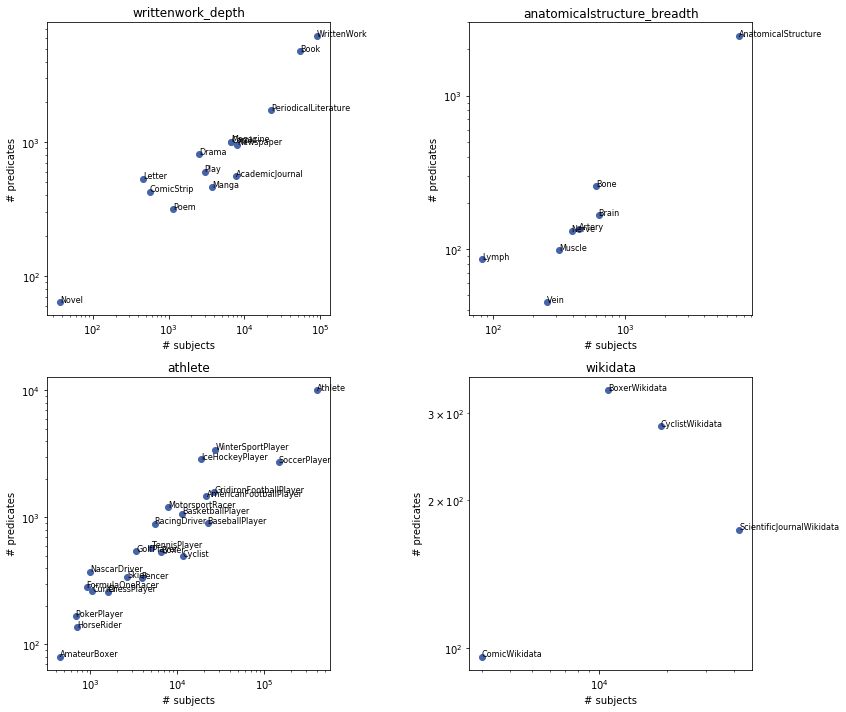

In [3]:
# Number of subjects and predicates per class

res = res_glob

runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "wikidata",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*5))
for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    display(res[["n_t", "n_b", "k_t_g", "k_b_g"]])
    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
    axes[row, col].set_title(run)
    axes[row, col].set_xlabel("# subjects")
    axes[row, col].set_ylabel("# predicates")
    
    axes[row, col].scatter(res["n_t"], res["n_b"], color=kit_blue_1, marker="o")
    for i, label in enumerate(res.index):
        axes[row, col].annotate(label, (res["n_t"][i], res["n_b"][i]), fontsize=8)
    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")
    axes[row, col].set_xlabel("# subjects")
    axes[row, col].set_ylabel("# predicates")

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

Compare relative values e.g. (k_mean_t / n_t) ?


,n_t,n_b,ndisc_t,ndisc_b,k_t_g,k_b_g,k_mean_t,k_sd_t,k_mean_b,k_sd_b,k_med_t,k_med_b,superclass
DocumentDBLP,"7,688",22,0,0,11.329500,3964.500000,7687.000000,0.000000,17.545455,3.215407,"7,687",18,none
AcademicJournal,"7,688",561,1,1,22.739334,311.622103,7387.351112,923.495416,47.389286,60.729540,"7,558",27,PeriodicalLiterature
ScientificJournalWikidata,"42,283",174,0,0,8.345813,2028.080460,42281.964950,1.428391,44.816092,39.376908,"42,282",32,none
WrittenWork,"90,862","6,235",4,0,15.743501,229.428388,63569.341786,22721.509958,92.951083,197.639222,"73,262",40,Work


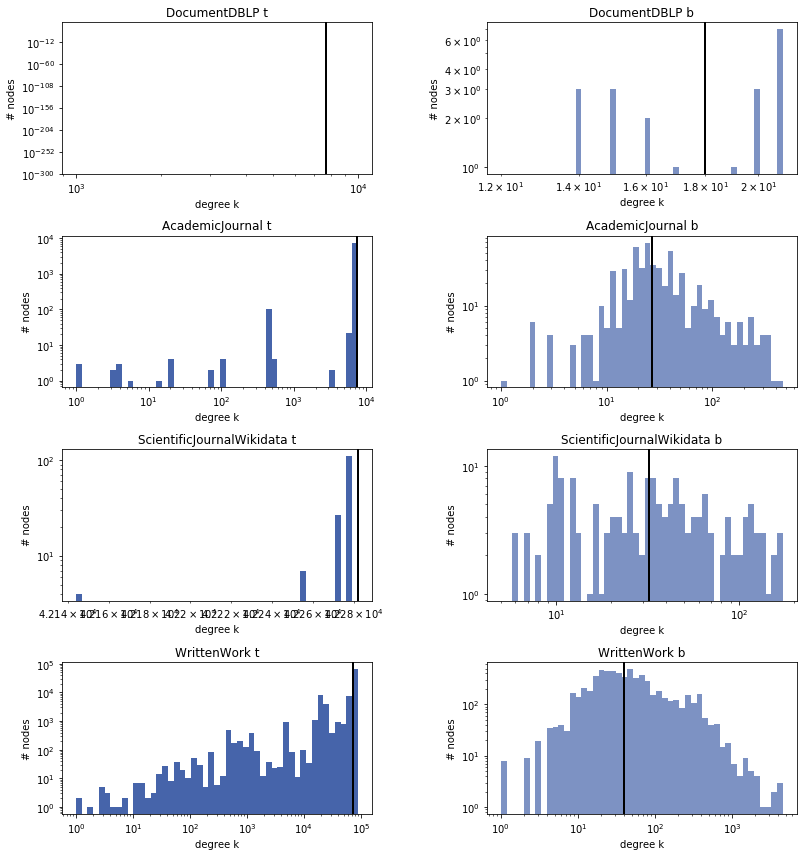

In [5]:
# Degree histogram of top and bot onemode graphs (log log scale)
# Wikidata degrees are most times 100% @ one k

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
# res = res.loc[[
#     "Athlete",
#     "Boxer",
#     "AmateurBoxer",
# #     "GridironFootballPlayer",
# #     "MotorsportRacer",
#     "RacingDriver",
#     "FormulaOneRacer",
#     "NascarDriver",
# #     "SoccerPlayer",
# #     "TennisPlayer",
# ]]
classes = list(res.index.values)
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_t = res.loc[classname, "n_t"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " t")
    axes[row, 0].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 0].set_xlabel("degree k")
    axes[row, 0].set_ylabel("# nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(k, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.k.json", "r") as input_file:
        dist = json.load(input_file)
    n_b = res.loc[classname, "n_b"]
    k = []
    for degree, count in dist.items():
        k.extend([int(degree)] * count)

    logbins = np.geomspace(min(k), max(k), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " b")
    axes[row, 1].axvline(np.median(k), color='k', linewidth=2)
    axes[row, 1].set_xlabel("degree k")
    axes[row, 1].set_ylabel("# nodes")
    hist, bins, _ = axes[row, 1].hist(k, bins=logbins, color=kit_blue_2)

print("Compare relative values e.g. (k_mean_t / n_t) ?")
display(res_disp[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]])

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("ddist.png", bbox_inches='tight', dpi=300)

In [5]:
# Latex table

res_tex = res_disp[["n_t", "n_b", "ndisc_t", "ndisc_b", "k_t_g", "k_b_g", "k_mean_t", "k_sd_t", "k_mean_b", "k_sd_b", "k_med_t", "k_med_b", "superclass"]]
res_tex.to_latex("table.tex")

In [5]:
# Get subjects and predicates whose nodedegree is in given range

def get_nodes_k_range(classname, onemode, start, end):
    with open(f"out/{classname}/{classname}.{onemode}.nk.json", "r") as in_file:
        nodedegrees = json.load(in_file)
    myresults = []
    for entity, degree in nodedegrees.items():
        if degree in range(start, end):
            myresults.append((entity, degree))
    myresults.sort(key=lambda x: x[1])
    print(f"{classname} {onemode}")
    for entity, degree in myresults[:20]:
        print(degree, entity)

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = ["Cyclist"]
for classname in classes:
    get_nodes_k_range(classname, "t", 900, 2000)
    get_nodes_k_range(classname, "b", 0, 10)
    print("\n")
    
# myresult = {key: mydict[key] for key in sorted(mydict, key=mydict.get, reverse=True)[:9]} # Get n highest/lowest pairs

Cyclist t
1198 http://dbpedia.org/resource/Nácor_Burgos
1198 http://dbpedia.org/resource/Tullio_Campagnolo
1198 http://dbpedia.org/resource/The_Collective_(mountain_biking)
1198 http://dbpedia.org/resource/Raphaël_Gagné
1198 http://dbpedia.org/resource/Haro_Bikes
1198 http://dbpedia.org/resource/Mooinjer_veggey
1198 http://dbpedia.org/resource/Alexis_Gewertz_Shepard
1198 http://dbpedia.org/resource/Tristyn_Kronk
1198 http://dbpedia.org/resource/Ryan_Nyquist
1198 http://dbpedia.org/resource/Richard_Sachs
1198 http://dbpedia.org/resource/Kris_Holm
1362 http://dbpedia.org/resource/Danny_Nelissen
Cyclist b
1 http://dbpedia.org/property/section
1 http://dbpedia.org/property/nonum
1 http://dbpedia.org/property/limit
2 http://dbpedia.org/property/side
2 http://dbpedia.org/property/top
2 http://dbpedia.org/property/num
6 http://dbpedia.org/property/cname
7 http://dbpedia.org/property/coordinates
7 http://dbpedia.org/property/birth
7 http://dbpedia.org/property/sname
7 http://dbpedia.org/proper

,n_t,n_b,m_t,m_b,w_med_t,w_med_b,superclass
DocumentDBLP,"7,688",22,"29,548,828",193,9,183,none
AcademicJournal,"7,688",561,"28,393,284","13,269",16,1,PeriodicalLiterature
ScientificJournalWikidata,"42,283",174,"893,904,162","3,899",6,2,none
WrittenWork,"90,862","6,235","2,887,891,628","289,775",3,1,Work


wmedp 183.0
Rectangle(xy=(1, 0), width=0.200335, height=6, angle=0)
Rectangle(xy=(1.20033, 0), width=0.240469, height=0, angle=0)
Rectangle(xy=(1.4408, 0), width=0.288643, height=0, angle=0)
Rectangle(xy=(1.72945, 0), width=0.346468, height=2, angle=0)
Rectangle(xy=(2.07591, 0), width=0.415877, height=0, angle=0)
Rectangle(xy=(2.49179, 0), width=0.499192, height=0, angle=0)
Rectangle(xy=(2.99098, 0), width=0.599197, height=1, angle=0)
Rectangle(xy=(3.59018, 0), width=0.719237, height=0, angle=0)
Rectangle(xy=(4.30942, 0), width=0.863325, height=16, angle=0)
Rectangle(xy=(5.17274, 0), width=1.03628, height=1, angle=0)
Rectangle(xy=(6.20902, 0), width=1.24388, height=2, angle=0)
Rectangle(xy=(7.4529, 0), width=1.49307, height=1, angle=0)
Rectangle(xy=(8.94598, 0), width=1.79219, height=7, angle=0)
Rectangle(xy=(10.7382, 0), width=2.15123, height=0, angle=0)
Rectangle(xy=(12.8894, 0), width=2.58219, height=3, angle=0)
Rectangle(xy=(15.4716, 0), width=3.09949, height=0, angle=0)
Rectangle(

Rectangle(xy=(1, 0), width=0.242823, height=1401, angle=0)
Rectangle(xy=(1.24282, 0), width=0.301786, height=0, angle=0)
Rectangle(xy=(1.54461, 0), width=0.375066, height=0, angle=0)
Rectangle(xy=(1.91968, 0), width=0.466141, height=587, angle=0)
Rectangle(xy=(2.38582, 0), width=0.579331, height=0, angle=0)
Rectangle(xy=(2.96515, 0), width=0.720005, height=250, angle=0)
Rectangle(xy=(3.68515, 0), width=0.894839, height=131, angle=0)
Rectangle(xy=(4.57999, 0), width=1.11213, height=130, angle=0)
Rectangle(xy=(5.69212, 0), width=1.38218, height=158, angle=0)
Rectangle(xy=(7.0743, 0), width=1.7178, height=67, angle=0)
Rectangle(xy=(8.7921, 0), width=2.13492, height=107, angle=0)
Rectangle(xy=(10.927, 0), width=2.65333, height=81, angle=0)
Rectangle(xy=(13.5803, 0), width=3.29762, height=88, angle=0)
Rectangle(xy=(16.878, 0), width=4.09836, height=89, angle=0)
Rectangle(xy=(20.9763, 0), width=5.09353, height=64, angle=0)
Rectangle(xy=(26.0699, 0), width=6.33036, height=42, angle=0)
Rectang

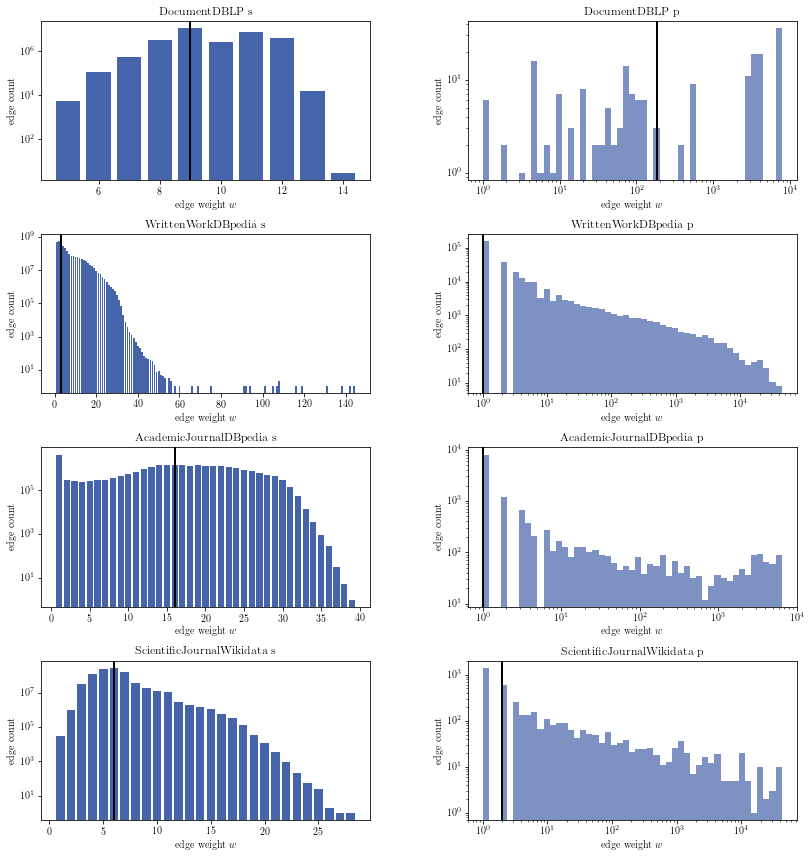

In [13]:
# Weight hist top and bot
# Difficulty: m_t very large, manual for t
# How to limit x axis?

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = [
    "DocumentDBLP",
    "WrittenWork",
    "AcademicJournal",
    "ScientificJournalWikidata",
]
# pd.options.display.float_format = '{:,.0f}'.format
display(res_disp[["n_t", "n_b", "m_t", "m_b", "w_med_t", "w_med_b", "superclass"]]) # TODO: sdev

fig, axes = plt.subplots(nrows=len(classes), ncols=2, sharex="none", sharey="none", figsize=(12, 3 * len(classes)))
for classname in classes:
    row = classes.index(classname)
    # Top (density dist)
    w = []
    pw = []
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        dist = json.load(input_file)
    median = res.loc[classname, "w_med_t"]
    for weight, count in dist.items():
        if int(weight) > 0:
            w.append(int(weight))
            pw.append(count)
    axes[row, 0].bar(w, pw, align='center', color=kit_blue_1)
    axes[row, 0].axvline(median, color='k', linewidth=2)
    axes[row, 0].set_title(classname + " s")
    if classname == "AcademicJournal":
        axes[row, 0].set_title("AcademicJournalDBpedia" + " s")
    if classname == "WrittenWork":
        axes[row, 0].set_title("WrittenWorkDBpedia" + " s")
    axes[row, 0].set_yscale("log")
    axes[row, 0].tick_params(axis="x", reset=True, top=False)
#     axes[row, 0].set_xticks(range(5, max(w), 5))
#     axes[row, 0].set_xticklabels(range(5, max(w), 5))
    axes[row, 0].set_xlabel("edge weight $w$")
    axes[row, 0].set_ylabel("edge count")
    # Bot (hist)
    w = []
    with open(f"out/{classname}/{classname}.b.w.json", "r") as input_file:
        dist = json.load(input_file)
    for weight, count in dist.items():
        if int(weight) > 0:
            w.extend([int(weight)] * count)
    
    logbins = np.geomspace(min(w), max(w), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " p")
    if classname == "AcademicJournal":
        axes[row, 1].set_title("AcademicJournalDBpedia" + " p")
    if classname == "WrittenWork":
        axes[row, 1].set_title("WrittenWorkDBpedia" + " p")
    axes[row, 1].set_xlabel("edge weight $w$")
    axes[row, 1].set_ylabel("edge count")
    print("wmedp", np.median(w))
    axes[row, 1].axvline(np.median(w), color='k', linewidth=2)
    hist, bins, _ = axes[row, 1].hist(w, bins=logbins, color=kit_blue_2)
#     print(bins)
    emptybins = 0
    for patchobj in _:
        print(patchobj)
        if patchobj.get_height() == 0:
            emptybins += 1
    print(classname, emptybins)
        

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

# fig.savefig("wdist.png", bbox_inches='tight', dpi=300)
fig.savefig("wdist.pdf")

In [31]:
# Latex table wdist
res_tex = res_disp[["n_t", "n_b", "m_t", "m_b", "w_med_t", "w_med_b", "superclass"]]
# display(res_tex)
res_tex.to_latex("table_wdist.tex")

In [8]:
# Mean of weight distributions for subjects
# If mean > median, distribution is right skewed
# If mean < median, distribution is left skewed
res = res_glob
classes = [
    "DocumentDBLP",
    "WrittenWork",
    "AcademicJournal",
    "ScientificJournalWikidata",
]
for classname in classes:
    w_mean_t = 0
    m_t = res.loc[classname]["m_t"]
    w_med_t = res.loc[classname]["w_med_t"]
    with open(f"out/{classname}/{classname}.t.w.json", "r") as input_file:
        wdist = json.load(input_file)
    for weight, count in wdist.items():
        w_mean_t += int(weight) * (count / m_t)
    if w_mean_t > w_med_t:
        skewness = "right skewed"
    else:
        skewness = "left skewed"
    print(classname, w_mean_t, w_med_t, skewness)

DocumentDBLP 9.843906533281118 9.0 right skewed
WrittenWork 4.890100030097115 3.0 right skewed
AcademicJournal 15.188601255141883 16.0 left skewed
ScientificJournalWikidata 5.876431095529454 6.0 left skewed


/home/david/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


,n_t,n_b,k_t_g,k_b_g,c_mean_t,c_sd_t,c_mean_b,c_sd_b,c_med_t,c_med_b,superclass
DocumentDBLP,"7,688.00",22.00,11.33,"3,964.50","75,670.11","3,794.29","41,201.91","33,871.18","76,149.00","39,087.00",none
AcademicJournal,"7,688.00",561.00,22.74,311.62,"112,203.53","44,751.07","7,932.95","30,371.82","127,212.00",29.50,PeriodicalLiterature
ScientificJournalWikidata,"42,283.00",174.00,8.35,"2,028.08","248,467.05","38,230.14","17,598.07","58,289.78","252,703.00",75.00,none
WrittenWork,"90,862.00","6,235.00",15.74,229.43,"310,860.44","205,948.56","4,633.74","40,442.02","305,451.50",63.00,Work


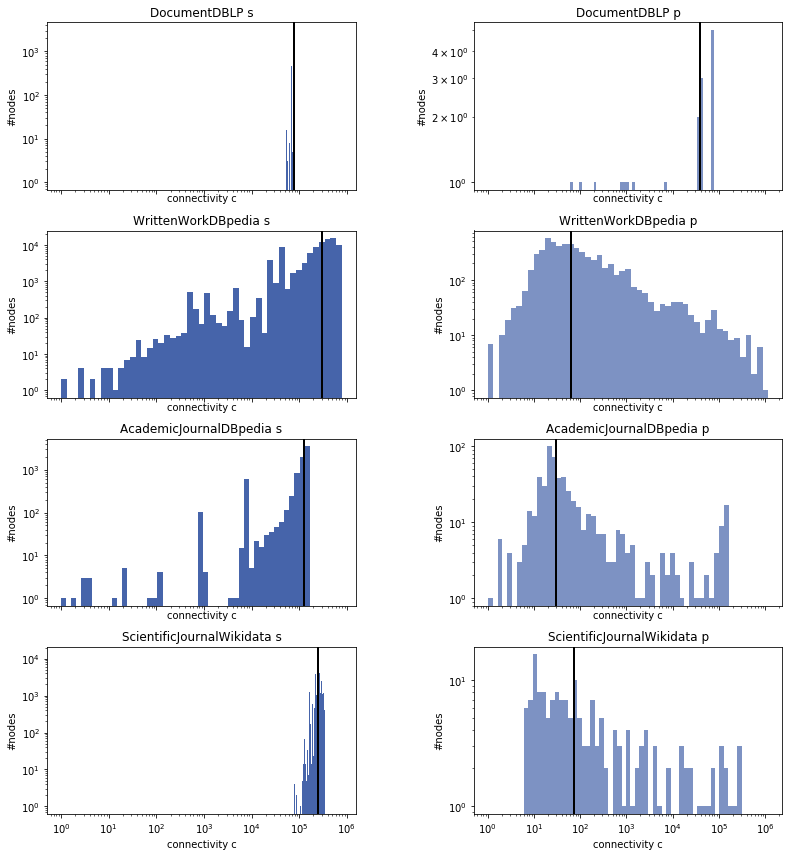

In [15]:
# Connectivity histogram of top and bot onemode graphs

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = [
    "DocumentDBLP",
    "WrittenWork",
    "AcademicJournal",
    "ScientificJournalWikidata",
]

pd.options.display.float_format = '{:,.2f}'.format
display(res[["n_t", "n_b", "k_t_g", "k_b_g", "c_mean_t", "c_sd_t", "c_mean_b", "c_sd_b", "c_med_t", "c_med_b", "superclass"]])
# print("Compare relative values e.g. (k_mean_t / n_t) ?")

nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="col", sharey="none", figsize=(12, 3 * nrows))
for classname in classes:
    row = classes.index(classname)
    # Top
    with open(f"out/{classname}/{classname}.t.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity)] * count)

    logbins = np.geomspace(min(c), max(c), 50) # geomspace cannot include 0 (disc nodes)
    axes[row, 0].set_xscale("log")
    axes[row, 0].set_yscale("log")
    axes[row, 0].set_title(classname + " s")
    if classname == "AcademicJournal":
        axes[row, 0].set_title("AcademicJournalDBpedia" + " s")
    if classname == "WrittenWork":
        axes[row, 0].set_title("WrittenWorkDBpedia" + " s")
    axes[row, 0].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 0].set_xlabel("connectivity c")
    axes[row, 0].set_ylabel("#nodes")
    # min_ylim, max_ylim = axes[row, 0].get_ylim()
    # axes[row, 0].text(np.median(k) * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(np.median(k))) # Draw median value
    hist, bins, _ = axes[row, 0].hist(c, bins=logbins, color=kit_blue_1)
    # Bot
    with open(f"out/{classname}/{classname}.b.c.json", "r") as input_file:
        dist = json.load(input_file)
    c = []
    for connectivity, count in dist.items():
        c.extend([int(connectivity) for i in range(0, count)])

    logbins = np.geomspace(min(c), max(c), 50)
    axes[row, 1].set_xscale("log")
    axes[row, 1].set_yscale("log")
    axes[row, 1].set_title(classname + " p")
    if classname == "AcademicJournal":
        axes[row, 1].set_title("AcademicJournalDBpedia" + " p")
    if classname == "WrittenWork":
        axes[row, 1].set_title("WrittenWorkDBpedia" + " p")
    axes[row, 1].axvline(np.median(c), color='k', linewidth=2)
    axes[row, 1].set_xlabel("connectivity c")
    axes[row, 1].set_ylabel("#nodes")
    hist, bins, _ = axes[row, 1].hist(c, bins=logbins, color=kit_blue_2)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("cdist.png", bbox_inches='tight', dpi=300)

In [43]:
# Latex table connectivity
res_tex = res_disp[["w_med_t", "w_med_b", "c_med_t", "c_med_b", "c_sd_t", "c_sd_b"]]
display(res_tex)
res_tex.to_latex("table.tex")

,w_med_t,w_med_b,c_med_t,c_med_b,c_sd_t,c_sd_b
DocumentDBLP,8,5,"76,149","39,087",3794.285253,33871.180345
AcademicJournal,16,1,"127,212",30,44751.065579,30371.817482
ScientificJournalWikidata,6,2,"252,703",75,38230.141449,58289.776769
WrittenWork,3,1,"305,452",63,205948.561307,40442.021439


In [9]:
# Get subjects and predicates whose connectivity is in given range

def get_nodes_c_range(classname, onemode, start, end):
    with open(f"out/{classname}/{classname}.{onemode}.nc.json", "r") as in_file:
        nodeconnectivities = json.load(in_file)
    myresults = []
    for entity, connectivity in nodeconnectivities.items():
        if connectivity in range(start, end):
            myresults.append((entity, connectivity))
    myresults.sort(key=lambda x: x[1])
    print(f"{classname} {onemode}")
    for entity, connectivity in myresults[:20]:
        print(connectivity, entity)

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
classes = ["Comic"]
for classname in classes:
    get_nodes_c_range(classname, "t", 10, 200)
    get_nodes_c_range(classname, "b", 40000, 100000)
    print("\n")
    
# myresult = {key: mydict[key] for key in sorted(mydict, key=mydict.get, reverse=True)[:9]} # Get n highest/lowest pairs

Comic t
22 http://dbpedia.org/resource/Cake_theory
25 http://dbpedia.org/resource/Teller_Amendment
32 http://dbpedia.org/resource/Watch_Out_Beagles_About
32 http://dbpedia.org/resource/Is
61 http://dbpedia.org/resource/Food_Additives_Amendment_of_1958
72 http://dbpedia.org/resource/The_Belles_of_St._Lemons
77 http://dbpedia.org/resource/Kefauver_Harris_Amendment
84 http://dbpedia.org/resource/Protect_America_Act_of_2007
86 http://dbpedia.org/resource/Chemical_Diversion_and_Trafficking_Act
89 http://dbpedia.org/resource/Refugee_Act
99 http://dbpedia.org/resource/Johnny_Bean_from_Happy_Bunny_Green
101 http://dbpedia.org/resource/Ecosystem_health
101 http://dbpedia.org/resource/Billy_the_Cat_and_Katie
101 http://dbpedia.org/resource/Pork_barrel
101 http://dbpedia.org/resource/Illinois_Fair_Tax
101 http://dbpedia.org/resource/Store_Wars
115 http://dbpedia.org/resource/Ball_Boy_(Beano)
115 http://dbpedia.org/resource/Number_13_Beano_Street
115 http://dbpedia.org/resource/The_Numskulls
115 h

n_t_super 7688.0
n_b_super 22.0
n_b_th DocumentDBLP 6.0
n_b_th AcademicJournal 6.0
n_b_th ScientificJournalWikidata 6.0


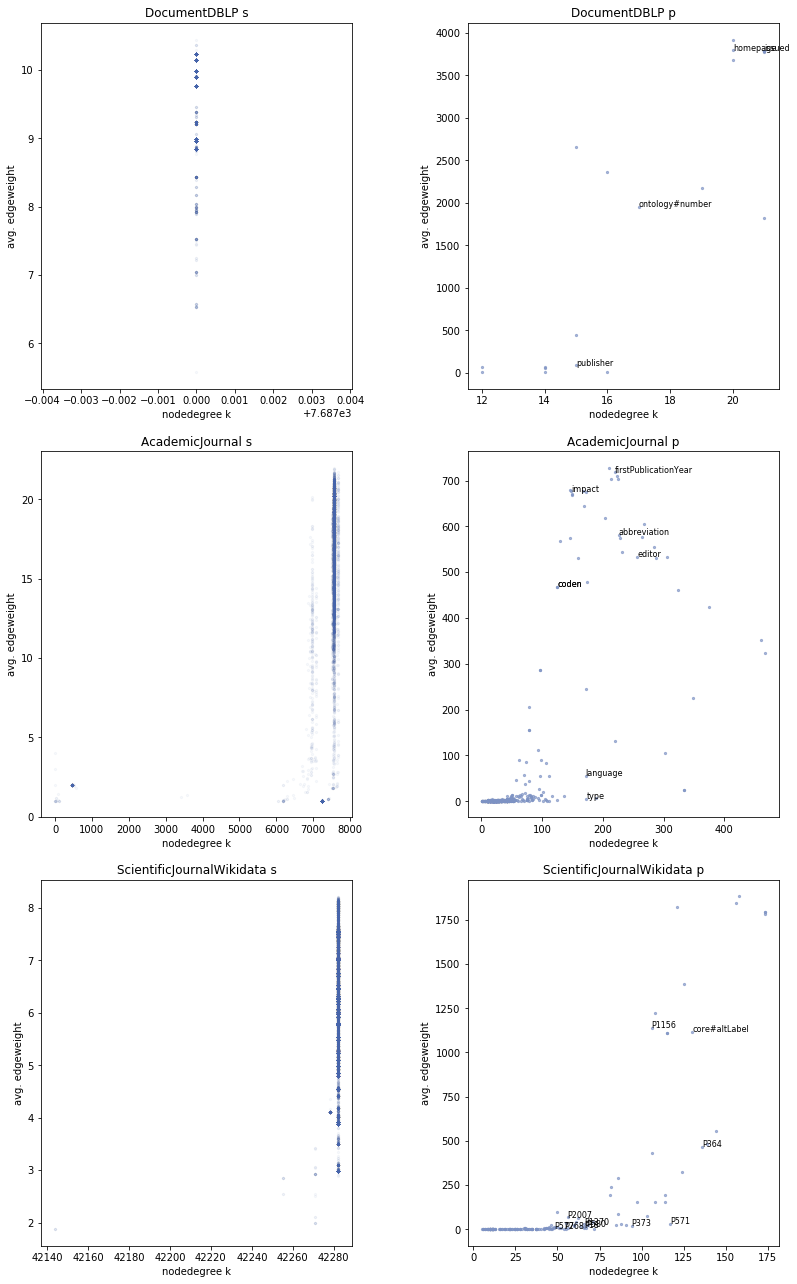

In [12]:
# Average edge weight (connectivity based) over degree per entity scatterplot

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame
classes = list(res.index.values)
# classes = [
#     "Athlete",
#     "Boxer",
#     "MotorsportRacer",
#     "IceHockeyPlayer",
# ]
nrows = len(classes)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*6))
n_t_super = res["n_t"].iloc[0]
n_b_super = res["n_b"].iloc[0]
print("n_t_super", n_t_super)
print("n_b_super", n_b_super)
for classname in classes:
    row = classes.index(classname)
    # Top
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.t.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.t.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1][:9])
        k.append(value)
        c.append(nc_dist.get(key) / value)

    axes[row, 0].set_title(classname + " s")
    axes[row, 0].set_xlabel("nodedegree k")
    axes[row, 0].set_ylabel("avg. edgeweight")
    axes[row, 0].scatter(k, c, s=5, color=kit_blue_1+"0a")
    # n_t = res.loc[classname, "n_t"]
    # n_t_th = round(np.interp(n_t, [0, n_t_super], [100, 600]))
    # print(f"n_t_th {classname} {n_t_th}")
    # for i, label in enumerate(n): # Only annotate some entities
    #     if (round(c[i]) % 2 == 0 and i % n_t_th == 0):
    #         axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)
    # Bot
    n = []
    k = []
    c = []
    with open(f"out/{classname}/{classname}.b.nk.json", "r") as input_file:
        nk_dist = json.load(input_file)
    with open(f"out/{classname}/{classname}.b.nc.json", "r") as input_file:
        nc_dist = json.load(input_file)

    for key, value in nk_dist.items():
        n.append(key.split('/')[-1])
        k.append(value)
        c.append(nc_dist.get(key) / value)
    
    axes[row, 1].set_title(classname + " p")
    axes[row, 1].set_xlabel("nodedegree k")
    axes[row, 1].set_ylabel("avg. edgeweight")
    axes[row, 1].scatter(k, c, s=5, color=kit_blue_2+"aa")
    n_b = res.loc[classname, "n_b"]
    n_b_th = round(np.interp(n_b, [0, n_b_super], [12, 6]))
    print(f"n_b_th {classname} {n_b_th}")
    for i, label in enumerate(n): # Annotate only some entities
        if ((k[i] > (axes[row, 1].get_xlim()[1] * 0.25) and i % n_b_th == 0)
            or (c[i] > (axes[row, 1].get_ylim()[1] * 0.25) and i % n_b_th == 0)):
            axes[row, 1].annotate(label, (k[i], c[i]), fontsize=8)

# TODO: Query subject and predicate examples from nk and nc (c == k * avg. edgeweight)

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("ckscatter.png", bbox_inches='tight', dpi=300)

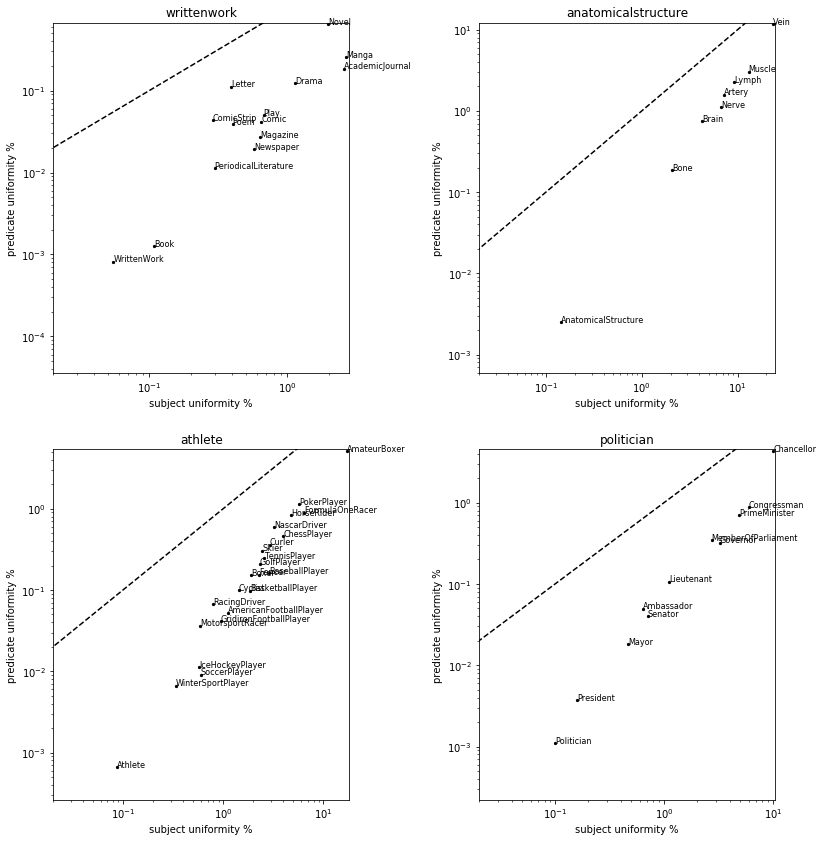

In [17]:
# rc_t over rc_b (in %) for each class and each run scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

nrows = math.ceil(len(runs) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, sharex="none", sharey="none", figsize=(12, nrows*6))
for run in runs:
    label = []
    sclass = []
    subj = []
    pred = []
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        label.append(classname)
        sclass.append(res.loc[classname, "superclass"])
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)

    runnr = runs.index(run)
    row = math.floor(runnr / 2)
    col = runnr % 2
    axes[row, col].set_title(run.split("_")[0])
    axes[row, col].set_xlabel("subject uniformity %")
    axes[row, col].set_ylabel("predicate uniformity %")
    axes[row, col].scatter(subj, pred, marker="o", s=5, color="black")
    for i, label in enumerate(label):
        axes[row, col].annotate(label, (subj[i], pred[i]), fontsize=8)

    xmin, xmax = axes[row, col].get_xlim()
    ymin, ymax = axes[row, col].get_ylim()
    axes[row, col].set_xlim(0.02, xmax)
    axes[row, col].set_ylim(ymin - (ymin * 1.001), ymax)

    axes[row, col].set_xscale("log")
    axes[row, col].set_yscale("log")

    axes[row, col].autoscale(False)

    origin_x = np.linspace(0.001,100,3)
    origin_y = origin_x
    axes[row, col].plot(origin_x, origin_y, color="black", linestyle="dashed")

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()

fig.savefig("rc_eachrun.png", bbox_inches='tight', dpi=300)

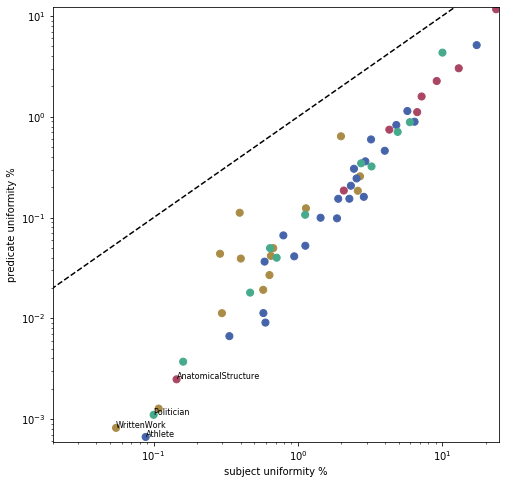

In [16]:
# rc_t over rc_b (in %) for each class and each run in one single scatterplot
runs = [
    "writtenwork_depth",
    "anatomicalstructure_breadth",
    "athlete",
    "politician_breadth",
]

label = []
subj = []
pred = []
color = []

for run in runs:
    res = pd.read_csv(f"out/_results_{run}.csv", index_col=0)
    for classname in res.index.values:
        if classname in ["WrittenWork", "AnatomicalStructure", "Athlete", "Politician"]:
            label.append(classname)
        else:
            label.append("")
        subj.append(res.loc[classname, "rc_dens_t"] * 100)
        pred.append(res.loc[classname, "rc_dens_b"] * 100)
        if run == "writtenwork_depth":
            color.append("#aa8c46")
        elif run == "anatomicalstructure_breadth":
            color.append("#aa4664")
        elif run == "athlete":
            color.append("#4664aa")
        elif run == "politician_breadth":
            color.append("#46aa8c")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.set_xlabel("subject uniformity %")
ax.set_ylabel("predicate uniformity %")
ax.scatter(subj, pred, marker="o", s=50, color=color)
for i, label in enumerate(label):
    ax.annotate(label, (subj[i], pred[i]), fontsize=8)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_xlim(0.02, xmax)
ax.set_ylim(ymin - (ymin * 1.001), ymax)

ax.set_xscale("log")
ax.set_yscale("log")

ax.autoscale(False)

origin_x = np.linspace(0.001,100,3)
origin_y = origin_x
origin_line = ax.plot(origin_x, origin_y, color="black", linestyle="dashed")

fig.savefig("rc_allruns.png", bbox_inches='tight', dpi=300)

In [ ]:
# KNC plots for each superclass and its subclasses

res = res_glob
# Control which classes to analyze. Add or remove rows in res DataFrame

# res_glob = res_glob.loc[[
#                         "WrittenWork", "WrittenWorkRandom",
#                         "AcademicJournal", "AcademicJournalRandom", "ScientificJournalWikidata",
#                         "Comic", "ComicRandom", "ComicWikidata",
#                         "Manga", "MangaRandom",
#                         "Novel",
#                         "PeriodicalLiterature", "PeriodicalLiteratureRandom",
#                         "Newspaper", "NewspaperRandom",
#                         "Poem", "PoemRandom",
#                         "Boxer", "BoxerWikidata",
#                         "Cyclist", "CyclistWikidata",
#                         ]]

# res = res.loc[[
#     "MotorsportRacer",
#     "FormulaOneRacer",
#     "NascarDriver",
# #     "Vein",
# ]]

classes = list(res.index.values)
# classes = [
#     "TennisPlayer",
#     "Fencer",
#     "FormulaOneRacer",
#     "IceHockeyPlayer",
# ]

display(res_disp[["n_t", "n_b", "ratio_sp", "dens_t", "dens_b", "k_0_t", "k_0_b", "rc_dens_t", "rc_dens_b", "rel_rc_t", "rel_rc_b", "superclass"]])

fig, axes = plt.subplots(len(classes), 2, sharex="none", sharey="col", figsize=(12, 3 * len(classes)))

# k_0_t_norm = (res["k_0_t"] / res["n_b"]).max() # Dynamic xmax (Can be very high with small density)
# print("k_0_t_norm", k_0_t_norm)

for classname in classes:
    row = classes.index(classname)
    try:
        df_t = pd.read_csv(f"out/{classname}/{classname}.t.knc.csv")
        df_b = pd.read_csv(f"out/{classname}/{classname}.b.knc.csv")
    except FileNotFoundError as e:
        print(classname, e)
    n_t = res.loc[classname, "n_t"]
    n_b = res.loc[classname, "n_b"]

    # Top
    k = []
    dens = []
    ncomp = []
    ncomp_abs = []
    slcc = []
    slcc_abs = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_t.columns:
        has_ncomp = True
    if "slcc" in df_t.columns:
        has_slcc = True

    for i, knc_row in df_t.iterrows():
        k.append(knc_row["k"] / n_b)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append((n_t - knc_row["ncomponents"]) / (n_t - 1))
            ncomp_abs.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append((knc_row["slcc"] - 1) / (n_t - 1))
            slcc_abs.append(knc_row["slcc"])
    
    if classname == "AcademicJournal":
        classname = "AcademicJournalDBpedia"
    if classname == "WrittenWork":
        classname = "WrittenWorkDBpedia"
    axes[row, 0].set_title(classname + " S")
    axes[row, 0].set_xlabel("k")
    axes[row, 0].set_ylabel("$\delta$")
#     axes[row, 0].plot(k, dens)
#     axes[row, 0].bar(k, ncomp, width=(-1/n_b), align="edge", color="#999999cc")
#     axes[row, 0].bar(k, slcc, width=(-1/n_b), align="edge", color="#999999aa")
    axes[row, 0].bar(k, dens, width=(-1/n_b), align="edge", color=kit_blue_1)
    axes[row, 0].set_xlim(0, 0.1)
    if has_ncomp and has_slcc:
        ax2 = axes[row, 0].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
        ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
        ax2.plot(k, slcc_abs, color="black", linestyle="dashed")
        ax2.set_ylabel("ncomp/slcc")
#     print("NCOMP T", ncomp[:10])
#     print("SLCC T", slcc[:10])
    # Bot
    k = []
    dens = []
    ncomp = []
    ncomp_abs = []
    slcc = []
    slcc_abs = []
    has_ncomp = False
    has_slcc = False
    if "ncomponents" in df_b.columns:
        has_ncomp = True
    if "slcc" in df_b.columns:
        has_slcc = True

    for i, knc_row in df_b.iterrows():
        k.append(knc_row["k"] / n_t)
        dens.append(knc_row["density"])
        if has_ncomp:
            ncomp.append((n_b - knc_row["ncomponents"]) / (n_b - 1))
            ncomp_abs.append(knc_row["ncomponents"])
        if has_slcc:
            slcc.append((knc_row["slcc"] - 1) / (n_b - 1))
            slcc_abs.append(knc_row["slcc"])

    if classname == "AcademicJournal":
        classname = "AcademicJournalDBpedia"
    if classname == "WrittenWork":
        classname = "WrittenWorkDBpedia"
    axes[row, 1].set_title(classname + " P")
    axes[row, 1].set_xlabel("k")
    axes[row, 1].set_ylabel("$\delta$")
#     axes[row, 1].plot(k, dens)
#     axes[row, 1].bar(k, ncomp, width=(-1/n_t), align="edge", color="#999999cc")
#     axes[row, 1].bar(k, slcc, width=(-1/n_t), align="edge", color="#999999aa")
    axes[row, 1].bar(k, dens, width=(-1/n_t), align="edge", color=kit_blue_2)
    axes[row, 1].set_xlim(0, 0.1)
    if classname == "DocumentDBLP":
        axes[row, 1].set_xlim(0, 1)
    axes[row, 1].set_ylim(0, 0.25)
    if has_ncomp and has_slcc:
        ax2 = axes[row, 1].twinx()
#         k.insert(0, 0)
#         first_ncomp, = ncomp.flat[0]
#         ncomp.insert(0, first_ncomp)
#         first_slcc, = slcc.flat[0]
#         slcc.insert(0, first_slcc)
        ax2.plot(k, ncomp_abs, color="black", linestyle="dotted")
        ax2.plot(k, slcc_abs, color="black", linestyle="dashed")
        ax2.set_ylabel("ncomp/slcc")

plt.subplots_adjust(wspace=50, hspace=10)
plt.tight_layout()

fig.savefig("knc.pdf") # bbox_inches='tight'

,n_t,n_b,ratio_sp,dens_t,dens_b,k_0_t,k_0_b,rc_dens_t,rc_dens_b,rel_rc_t,rel_rc_b,superclass
WrittenWork,"90,862","6,235",14.572895,0.699602,0.014910,145,"43,973",0.0005,0.0000,NaN,NaN,Work
Book,"54,578","4,816",11.332641,0.664870,0.018122,109,"34,408",0.0011,0.0000,1.973920,1.552649,WrittenWork
Novel,37,64,0.578125,0.610084,0.174107,9,28,0.0199,0.0064,36.229853,783.344965,Book
Comic,"6,688",996,6.714859,0.896688,0.062425,48,"5,147",0.0065,0.0004,11.836126,50.951361,WrittenWork
ComicStrip,561,428,1.310748,0.436281,0.088708,33,187,0.0029,0.0004,5.258883,53.502945,Comic
Manga,"3,783",459,8.241830,0.981730,0.145770,48,"3,298",0.0269,0.0026,49.083107,313.831196,Comic
Drama,"2,530",813,3.111931,0.896115,0.110798,57,"1,657",0.0114,0.0012,20.717117,151.202294,WrittenWork
Letter,465,534,0.870787,0.811383,0.240129,145,415,0.0039,0.0011,7.194502,136.534040,WrittenWork
PeriodicalLiterature,"22,235","1,743",12.756741,0.863552,0.030943,40,"14,725",0.0030,0.0001,5.419669,13.749793,WrittenWork
AcademicJournal,"7,688",561,13.704100,0.960894,0.084775,40,"6,451",0.0260,0.0018,47.413053,225.645640,PeriodicalLiterature


KeyboardInterrupt: 

In [9]:
# Latex table

# res = res_glob
# # Control which classes to analyze. Add or remove rows in res DataFrame
# classes = list(res.index.values)

res_tex = res_disp[["n_t", "n_b", "ratio_sp", "dens_t", "dens_b", "k_0_t", "k_0_b", "rc_dens_t", "rc_dens_b", "rel_rc_t", "rel_rc_b", "superclass"]]
display(res_tex)
res_tex.to_latex("table.tex")

,n_t,n_b,ratio_sp,dens_t,dens_b,k_0_t,k_0_b,rc_dens_t,rc_dens_b,rel_rc_t,rel_rc_b,superclass
Athlete,"404,915","10,030",40.370389,0.963014,0.014080,226,"348,245",0.0009,0.0000,NaN,NaN,Person
Boxer,"6,457",535,12.069159,0.958609,0.151080,43,"5,968",0.0190,0.0015,21.624237,231.267091,Athlete
AmateurBoxer,445,80,5.562500,1.000000,0.546835,28,inf,0.1734,0.0515,197.006756,7750.214705,AmateurBoxer
GridironFootballPlayer,"26,560","1,582",16.788875,0.983335,0.062167,79,"24,864",0.0094,0.0004,10.709795,62.055436,Athlete
AmericanFootballPlayer,"21,579","1,467",14.709611,0.981450,0.065589,79,"20,361",0.0113,0.0005,12.791436,79.064663,GridironFootballPlayer
MotorsportRacer,"7,838","1,204",6.509967,0.918255,0.066540,68,"5,739",0.0059,0.0004,6.674439,55.002322,Athlete
RacingDriver,"5,454",894,6.100671,0.899112,0.080174,64,"3,597",0.0079,0.0007,9.006076,100.161499,MotorsportRacer
FormulaOneRacer,902,281,3.209964,0.979227,0.262023,45,839,0.0643,0.0089,73.109850,1345.590713,RacingDriver
NascarDriver,986,374,2.636364,0.965884,0.190492,64,922,0.0321,0.0060,36.499943,897.763576,RacingDriver
WinterSportPlayer,"27,278","3,425",7.964380,0.913646,0.040078,226,"21,268",0.0033,0.0001,3.805476,10.018412,Athlete


n_t 5, n_b 4, m 10


/home/david/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


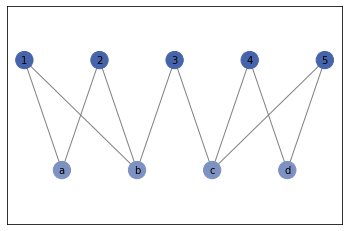

In [13]:
# Example bipartite graphs
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5], bipartite=0)
G.add_nodes_from(["a", "b", "c", "d"], bipartite=1)
# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])
# FiveFour graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),
#                     (2,"a"),(2,"b"),(2,"c"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"b"),(4,"c"),
#                     (5,"d")])
# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
G.add_edges_from([(1,"a"),(1,"b"),
                    (2,"a"),(2,"b"),
                    (3,"b"),(3,"c"),
                    (4,"c"),(4,"d"),
                    (5,"c"),(5,"d")])
top = [1, 2, 3, 4, 5] # top, bot = nx.bipartite.sets(G)
bot = ["a", "b", "c", "d"]
color_dict = {0: kit_blue_1, 1: kit_blue_2}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
print(f"n_t {len(top)}, n_b {len(bot)}, m {G.number_of_edges()}")

# bi_layout = nx.bipartite_layout(G, top, align="horizontal", aspect_ratio=20, scale=1)
# nx.draw_networkx(G, bi_layout, font_size=10, edge_color="grey", node_color=color_list)

bot_len = len(bot)
pos = dict()
pos.update((n, (i, 1.1)) for i, n in enumerate(top))
pos.update((n, (i + 0.5, 1)) for i, n in enumerate(bot))
nx.draw_networkx(G, pos=pos, font_size=10, edge_color="grey", node_color=color_list)

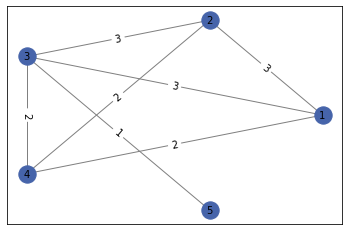

In [14]:
# Example onemode graphs
G = nx.Graph()
# Top mode
# FiveFour graph
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,3),(1,3,3),(1,4,2),
                            (2,3,3),(2,4,2),
                            (3,4,2),(3,5,1)])

nx.draw_networkx(G, pos=nx.circular_layout(G, scale=1), font_size=10, edge_color="grey", node_color=kit_blue_1)
labels = nx.get_edge_attributes(G, 'weight')
_ = nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G, scale=1), edge_labels=labels, font_size=10)

# Full connected graph
# G.add_edges_from([(1,"a"),(1,"b"),(1,"c"),(1,"d"),
#                     (2,"a"),(2,"b"),(2,"c"),(2,"d"),
#                     (3,"a"),(3,"b"),(3,"c"),(3,"d"),
#                     (4,"a"),(4,"b"),(4,"c"),(4,"d"),
#                     (5,"a"),(5,"b"),(5,"c"),(5,"d")])

# Disconnected graph
# G.add_edges_from([(1,"a"),
#                     (2,"b"),
#                     (3,"c"),
#                     (4,"d")])
# 2 Cluster graph
# G.add_edges_from([(1,"a"),(1,"b"),
#                     (2,"a"),(2,"b"),
#                     (3,"b"),(3,"c"),
#                     (4,"c"),(4,"d"),
#                     (5,"c"),(5,"d")])

# G.add_nodes_from(["a", "b", "c", "d"])